
minist : 손글씨 데이터셋 0~9 10개의 숫자값에 대한 분류!  
--> 1장 데이터 : 28 by 28 2D  
(ML : 28*28 = 756 1차원 벡터)  
--> 데이터 셋 : (60000, 28, 28) => 3D

FashionMNIST : 의상관련된 이미지 분류 셋!!!!!  
 --> 1장 데이터 : 28,28 ==> 2D (흑백)  
--> DL을 통해서 10가지의 의상을 분류!!!  
&emsp; 원래는 이미 셋이 이미지 --> CNN 구조를 사용해야 잘 나옴!!!
==> 일반적인 Dense레이어를 쌓는 방식의 DNN 구조로 설계!!!!
 + CNN구조로 설계 향후에 보겠습니다..

In [2]:
import tensorflow as tf


# 1. 데이터셋 불러오기

In [8]:
fashion_mnist = tf.keras.datasets.fashion_mnist
fashion_mnist

<module 'keras.api._v2.keras.datasets.fashion_mnist' from '/usr/local/lib/python3.10/dist-packages/keras/api/_v2/keras/datasets/fashion_mnist/__init__.py'>

In [9]:
(train_X, train_y), (test_X, test_y) = fashion_mnist.load_data()
print(train_X.shape)
print(train_y.shape)
print(test_X.shape)
print(test_y.shape)

4422102/4422102 [==============================] - 1s 0us/step
(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


# 2. 전처리 + EDA

In [10]:
# 실제 프로젝트 : 각가 전처리!!!!
# ---> 이미지 데이터 전처리 : openCV(C/C++)
# + resize, crop, 색상변환(컬럼 -> 흑백변환, 차원 낮추기), 해상도 등...

In [11]:
import matplotlib.pyplot as plt

9


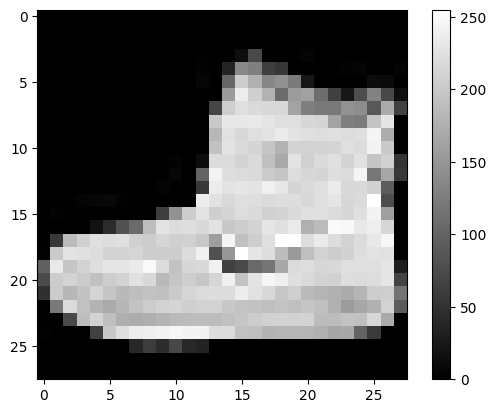

In [12]:
plt.imshow(train_X[0], cmap="gray")
plt .colorbar()
print(train_y[0])

In [14]:
# 데이터들의 경우에는 보면 8비트로 0~255까지의 값
# --> 이미지 표현의 경우에는 정해진 룰일 딱 존재해서...
# --> 일괄적으로 처리하는 경우들이 좀 많이 있음
# 값 재조정 : 0~1 MinMaxScaler etc, 0을 중심으로 standardScale etc

train_X = train_X / 255.0
test_X = test_X / 255.0

# 3. 모델 설계

In [15]:
# 모델을 설계 하는데 기준 :
# --> 1개 샘플을 기준으로 함
# --> 설계 방식 : 전통적인 DNN 구조로 설계!
    # 1) DNN으로 설계하기 위해서 flatten (2D->1D)
    #   input layer : 노드 (764개)
    # 2) HL : 1개만 쌓을 거임(이유는 없음. node =128, AF= Relu)
    # 3) OL : 10개에 대한 분류 -> node = 10 + AF : softmax

# 주의!
# 정답이 train_y는 라벨인코딩! -> 원핫인코딩을 해야하는데
#                             => 지금 주어진 정답 : 라벨인코딩 1D,
#                             => OL 연결된 정답 : 원핫인코딩 2D

In [16]:
train_X.shape

(60000, 28, 28)

In [17]:
train_X[0].shape

(28, 28)

In [20]:
# 모델 구조\
model = tf.keras.Sequential(
    [
        # 쌓는 순서는 입력에서 출력방향으로 쌓아야 함
        # 1) 2d 입력을 받아서 1d 모양: 단순 모양 + 1개 샘플의 모양을 입력
        tf.keras.layers.Flatten(input_shape = (28,28)),

        # 2) HL : 일반적인 Dense 레이어로 기능
        # ++ 여러층 추가, 노드도 변경 AF 변경 가능(하이퍼 파라미터 영역)
        tf.keras.layers.Dense(units = 128, activation="relu"),

        # 3) output layer 설계
        # ==> 내 모델의 목적! 목적에 고정
        # 목적 : 분류 + 10종
        tf.keras.layers.Dense(units = 10, activation = "softmax")

    ]
)
model

In [21]:
 model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 784)               0         
                                                                 
 dense_2 (Dense)             (None, 128)               100480    
                                                                 
 dense_3 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101770 (397.54 KB)
Trainable params: 101770 (397.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
# 데이터 784 개 + bias 1개 가 같이 input 됨

In [22]:
# 모델에 있는 weights 들을 어떻게 학습할까->세팅
model.compile(
    loss = "categorical_crossentropy",# 정답을 OneHotEncoding
    optimizer= tf.keras.optimizers.Adam(),
    # 주어진 약 10개의 weight 파라미터를
    # loss CE 관점으로 어찌 최적화를 할지에 대한 방식
    # GD -> 인공신경망  Adam() 최적화 방식

    metrics = ["accuracy"]
    # 잘 학습이 되는지 모니터링 지표


)

In [24]:
# 참고) 정답지의 모양을 OHEncoding 으로 방식으로 변환
# why 여러개의 분류 목적에 의한 output layer 의 노드와 연결
train_y[0]
# [0,0,0,0,0,0,0,0,1]
# ++
tf.keras.utils.to_categorical(train_y[0], num_classes=20)

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0.], dtype=float32)

# 4. 모델 학습

In [26]:
# 인공신경망으로 분류!
# + 정답에 대한 처리!!!!!
history = model.fit(
    train_X,
    tf.keras.utils.to_categorical(train_y, num_classes=10),

    # 얼마나 많은 train 데이터를 재활용할까 epoch
    epochs = 100, # overfit + 시간
    batch_size = 256, # HW 스펙에 따라서 다름 gpu -> ram
    validation_split = 0.25
)

Epoch 1/100
176/176 [==============================] - 1s 6ms/step - loss: 0.3821 - accuracy: 0.8653 - val_loss: 0.3775 - val_accuracy: 0.8670
Epoch 2/100
176/176 [==============================] - 1s 4ms/step - loss: 0.3650 - accuracy: 0.8718 - val_loss: 0.3658 - val_accuracy: 0.8693
Epoch 3/100
176/176 [==============================] - 1s 4ms/step - loss: 0.3529 - accuracy: 0.8740 - val_loss: 0.3656 - val_accuracy: 0.8697
Epoch 4/100
176/176 [==============================] - 1s 4ms/step - loss: 0.3405 - accuracy: 0.8782 - val_loss: 0.3517 - val_accuracy: 0.8763
Epoch 5/100
176/176 [==============================] - 1s 4ms/step - loss: 0.3302 - accuracy: 0.8819 - val_loss: 0.3508 - val_accuracy: 0.8724
Epoch 6/100
176/176 [==============================] - 1s 4ms/step - loss: 0.3186 - accuracy: 0.8861 - val_loss: 0.3381 - val_accuracy: 0.8789
Epoch 7/100
176/176 [==============================] - 1s 4ms/step - loss: 0.3101 - accuracy: 0.8887 - val_loss: 0.3488 - val_accuracy: 0.8757

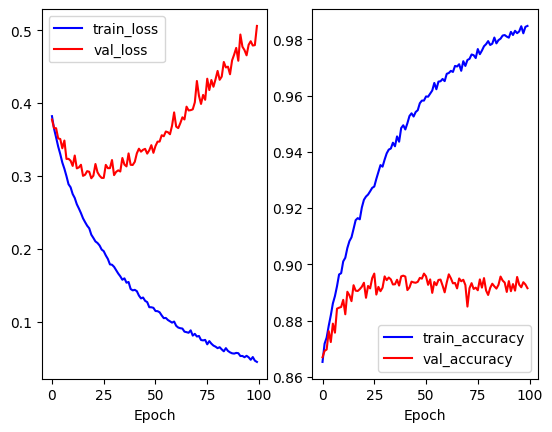

In [27]:
# 위의 결과를 그래프로 그려보자!!!
plt.subplot(1,2,1) # loss

plt.plot(history.history["loss"], "b-", label="train_loss")
plt.plot(history.history["val_loss"], "r-", label="val_loss")
plt.xlabel("Epoch")
plt.legend()

plt.subplot(1,2,2) # metrics : accuracy
plt.plot(history.history["accuracy"], "b-", label="train_accuracy")
plt.plot(history.history["val_accuracy"], "r-", label="val_accuracy")
plt.xlabel("Epoch")
plt.legend()

In [28]:
# 실제 평가 : X_test에 대해서 진행!
# -> 학습한 그대로 평가!
# 주의해야할 부분 : test_y ---> OH인코딩!!!!!!!
model.evaluate( test_X, test_y) # 이렇게 하면 오류남

ValueError: in user code:

    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 2066, in test_function  *
        return step_function(self, iterator)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 2049, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 2037, in run_step  **
        outputs = model.test_step(data)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1919, in test_step
        self.compute_loss(x, y, y_pred, sample_weight)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1209, in compute_loss
        return self.compiled_loss(
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/compile_utils.py", line 277, in __call__
        loss_value = loss_obj(y_t, y_p, sample_weight=sw)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/losses.py", line 143, in __call__
        losses = call_fn(y_true, y_pred)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/losses.py", line 270, in call  **
        return ag_fn(y_true, y_pred, **self._fn_kwargs)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/losses.py", line 2221, in categorical_crossentropy
        return backend.categorical_crossentropy(
    File "/usr/local/lib/python3.10/dist-packages/keras/src/backend.py", line 5573, in categorical_crossentropy
        target.shape.assert_is_compatible_with(output.shape)

    ValueError: Shapes (None, 1) and (None, 10) are incompatible


In [30]:
model.evaluate( test_X, tf.keras.utils.to_categorical(test_y))

313/313 [==============================] - 1s 2ms/step - loss: 0.5667 - accuracy: 0.8832


[0.5667233467102051, 0.8831999897956848]

In [33]:
y_pred = model.predict(test_X)
y_pred

313/313 [==============================] - 1s 2ms/step


array([[1.3678767e-16, 3.3039174e-20, 9.7945596e-15, ..., 1.0334514e-05,
        1.1676774e-12, 9.9998963e-01],
       [1.0816647e-03, 4.9987629e-18, 9.9891734e-01, ..., 2.8787819e-19,
        3.5795292e-21, 7.8314272e-28],
       [1.1701313e-15, 1.0000000e+00, 3.9102159e-18, ..., 1.0578024e-24,
        1.7491918e-24, 1.5176287e-29],
       ...,
       [1.0290480e-13, 6.2161851e-22, 1.1382934e-11, ..., 2.7272301e-11,
        1.0000000e+00, 2.1308877e-22],
       [6.8147009e-16, 1.0000000e+00, 6.9755241e-19, ..., 5.4417404e-16,
        1.0973931e-15, 2.9248078e-19],
       [2.4980590e-10, 6.6402440e-17, 2.5874014e-12, ..., 3.1068623e-05,
        5.2111865e-08, 2.7429960e-13]], dtype=float32)

In [34]:
y_pred[0].sum()

1.0

In [35]:
y_pred[0].argmax() # -->  9+1번째 클래스가 가장 확률이 컸다!!!

9

<img src="https://drive.google.com/uc?id=1_axH4QGvO9sH34AzX1TTvhi15k-e8eUJ">

In [37]:
y_pred[0][9]

0.9999896

In [38]:
# 결론1) 다순하게 HL1 ---> X_test
#        ACC : 0.87

In [ ]:
# 성능을 향상하고자 하는 것이 목적!!!
# 시도2) Layer의 수를 (HL) 늘려서 --> 비선형을 더 획득해서
#        더더더 구불한 선으로 찾아보자!!!!
# ===> HL의 레이어의 수를 증가하는 방법으로 시도!!!!
# (참고) 일반적으로 DL은 모델 구조가 성능에 크게 좌우!!!
#  +++ 선행 연구들을 찾아볼 수 있어야 함!!!!

In [39]:
# 모델 구조 : 1개 샘플단위로 설계!!!!!!!!
model = tf.keras.Sequential(
    [
        tf.keras.layers.Flatten( input_shape =( 28,28)),
        # 2) HL : 일반적인 Dense 레이어로 기능
        # ++ HL의 레이어만 더 쌓아서 구조 변경!!!!
        tf.keras.layers.Dense( units=128, activation="relu"),
        tf.keras.layers.Dense( units=64, activation="relu"),
        tf.keras.layers.Dense( units=32, activation="relu"),
        # 3) output Layer 설계
        tf.keras.layers.Dense( units =10,activation="softmax" )
    ]
)
model

In [40]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_3 (Flatten)         (None, 784)               0         
                                                                 
 dense_4 (Dense)             (None, 128)               100480    
                                                                 
 dense_5 (Dense)             (None, 64)                8256      
                                                                 
 dense_6 (Dense)             (None, 32)                2080      
                                                                 
 dense_7 (Dense)             (None, 10)                330       
                                                                 
Total params: 111146 (434.16 KB)
Trainable params: 111146 (434.16 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [42]:
# 이 모델에 있는 weights들을 어찌 학습할까???
# ==> 세티!!!!
model.compile(
    loss = "categorical_crossentropy", # 정답을 OHE
    optimizer = tf.keras.optimizers.Adam(),
    # 주어진 약 10개의 weight 파라미터를
    # loss CE관점으로 어찌 최적화를 할지에 대한 방식
    # GD --> 인공신경망,,,, Adam()최적화 방식...
    metrics =["accuracy"]
    # 잘 학습이 되는지 모니터링 지표...
)

In [43]:
# 인공신경망으로 분류!
# + 정답에 대한 처리!!!!!
history = model.fit(
    train_X,
    tf.keras.utils.to_categorical(train_y, num_classes=10),
    # 얼마나 많은 train  데이터를 재활용할까요 epoch
    epochs = 50,# 성능train--> OverFit + 시간!!!!
    batch_size = 256, # 여러분들의 HW 스펙에 ...GPU-> RAM
    validation_split=0.25
)

Epoch 1/50
176/176 [==============================] - 3s 7ms/step - loss: 0.6988 - accuracy: 0.7604 - val_loss: 0.4704 - val_accuracy: 0.8359
Epoch 2/50
176/176 [==============================] - 1s 5ms/step - loss: 0.4314 - accuracy: 0.8491 - val_loss: 0.4230 - val_accuracy: 0.8523
Epoch 3/50
176/176 [==============================] - 1s 6ms/step - loss: 0.3849 - accuracy: 0.8634 - val_loss: 0.3973 - val_accuracy: 0.8560
Epoch 4/50
176/176 [==============================] - 1s 6ms/step - loss: 0.3639 - accuracy: 0.8676 - val_loss: 0.3735 - val_accuracy: 0.8651
Epoch 5/50
176/176 [==============================] - 1s 5ms/step - loss: 0.3346 - accuracy: 0.8795 - val_loss: 0.3555 - val_accuracy: 0.8740
Epoch 6/50
176/176 [==============================] - 1s 4ms/step - loss: 0.3178 - accuracy: 0.8856 - val_loss: 0.3521 - val_accuracy: 0.8747
Epoch 7/50
176/176 [==============================] - 1s 4ms/step - loss: 0.3060 - accuracy: 0.8887 - val_loss: 0.3383 - val_accuracy: 0.8781
Epoch 

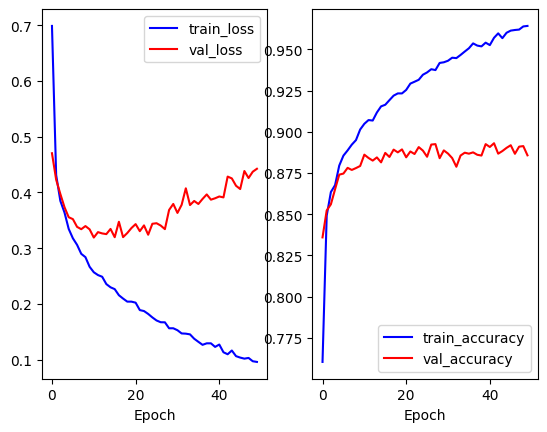

In [44]:
# 위의 결과를 그래프로 그려보자!!!
plt.subplot(1,2,1) # loss

plt.plot(history.history["loss"], "b-", label="train_loss")
plt.plot(history.history["val_loss"], "r-", label="val_loss")
plt.xlabel("Epoch")
plt.legend()

plt.subplot(1,2,2) # metrics : accuracy
plt.plot(history.history["accuracy"], "b-", label="train_accuracy")
plt.plot(history.history["val_accuracy"], "r-", label="val_accuracy")
plt.xlabel("Epoch")
plt.legend()

In [45]:
model.evaluate( test_X, tf.keras.utils.to_categorical(test_y))

313/313 [==============================] - 1s 4ms/step - loss: 0.5005 - accuracy: 0.8797


[0.5004932880401611, 0.8797000050544739]

In [ ]:
# 결론2)
# 실험1 IL-HL-OL :0.87
# 실험2 :IL-HL-HL-HL-OL : 0.88
# 1% 성능 향상
# 0.9% 넘기기가 정말 힘듬
# 설계 방싱 CNN : 0.9 가볍게 넘어감

# 결론) DL의 성능은 기본적으로 모델의 구조에 기인
# -> 모델의 구조 & 최신 설계 방식 계속 모니터링
#   논문 검색. 최신 기술 계속 참고할 것.